# Ajuste de la cantidad de parámetros de un modelo

Ya sabemos que es

¿Cuando se da el overfitting?

La cantidad de parámetros comparable con la cantidad de observaciones

Estrategia natural: Reducir la cantidad de parámetros

In [4]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


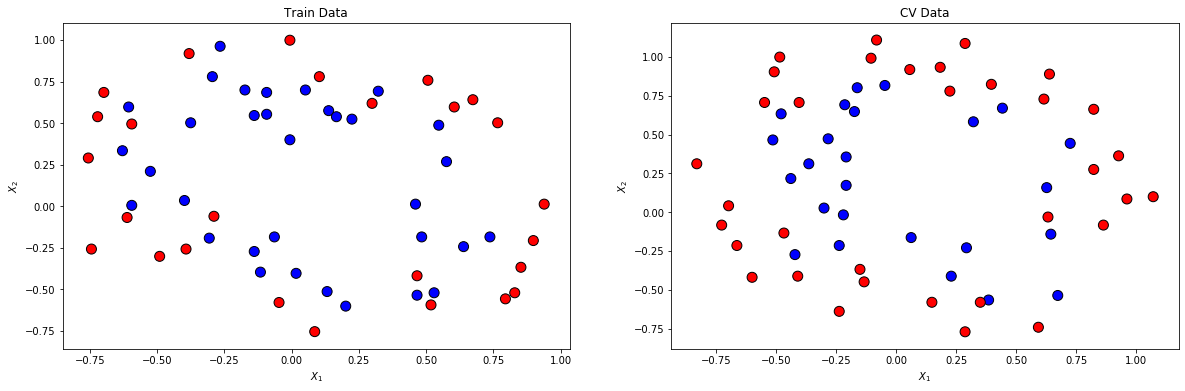

In [6]:
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

# Regresión logística - Underfitting - High Bias

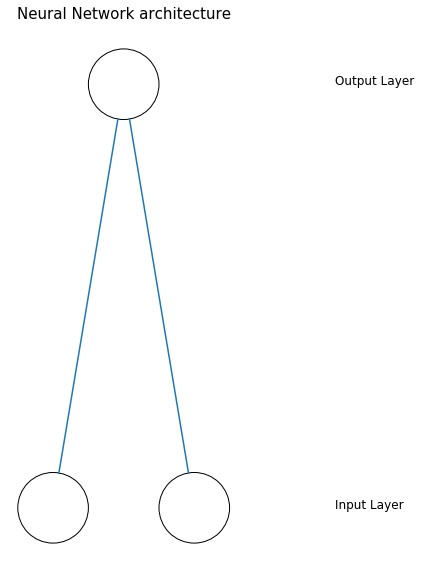

In [7]:
network = draw_nn.DrawNN( [2, 1] )
network.draw()

\begin{equation}
\large
a = x_1w_1 + x_2w_2+w_0
\end{equation}
\begin{equation}
\large
y = \sigma(a)
\end{equation}

Regresion Logistica Polinomial de orden 1, con lamdba (regularización L2):0


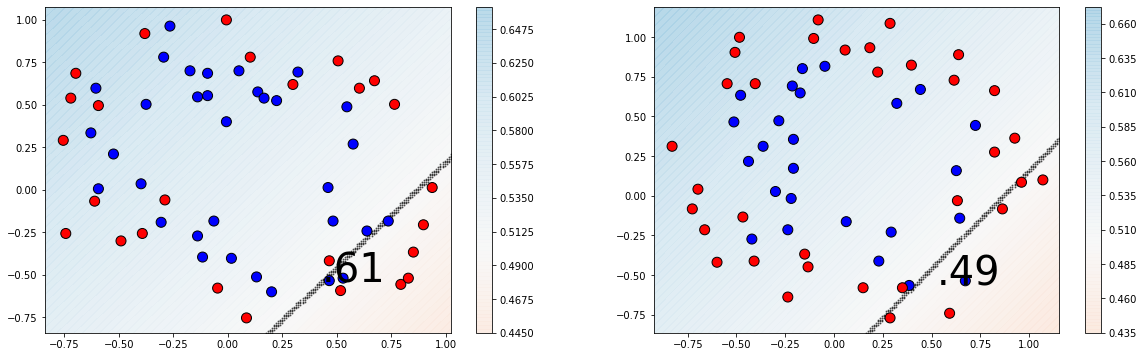

In [19]:
degree = 1
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree, lambd = 0)

# Regresión logística polinomial - Overfitting - High Variance

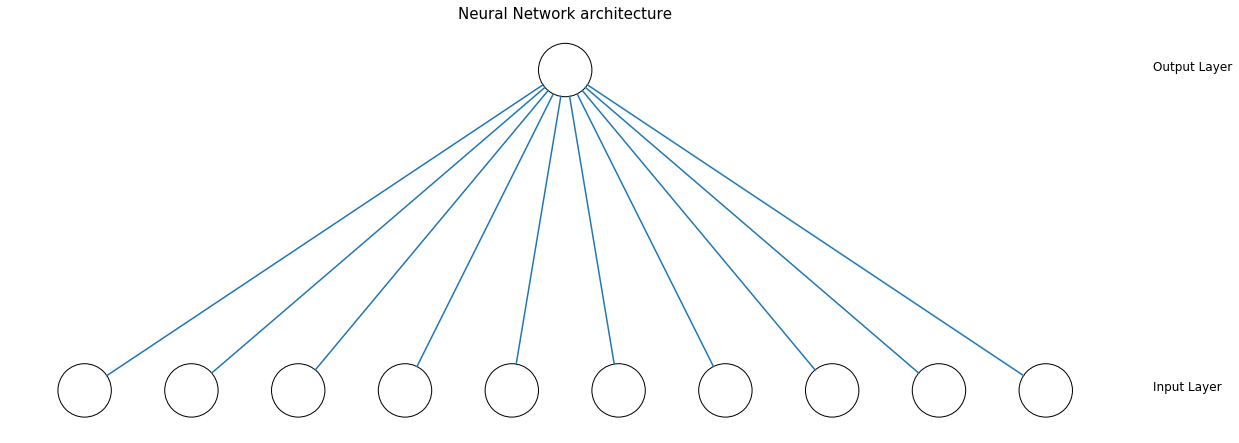

In [20]:
network = draw_nn.DrawNN( [10, 1] )
network.draw()

\begin{equation}
\large
a = w_0 + x_1w_1 + x_2w_2 + x_1x_2w_3 + w_4x_1^2 + w_5x_2^2 + ... + w_Nx_1^K
\end{equation}
\begin{equation}
\large
y = \sigma(a)
\end{equation}

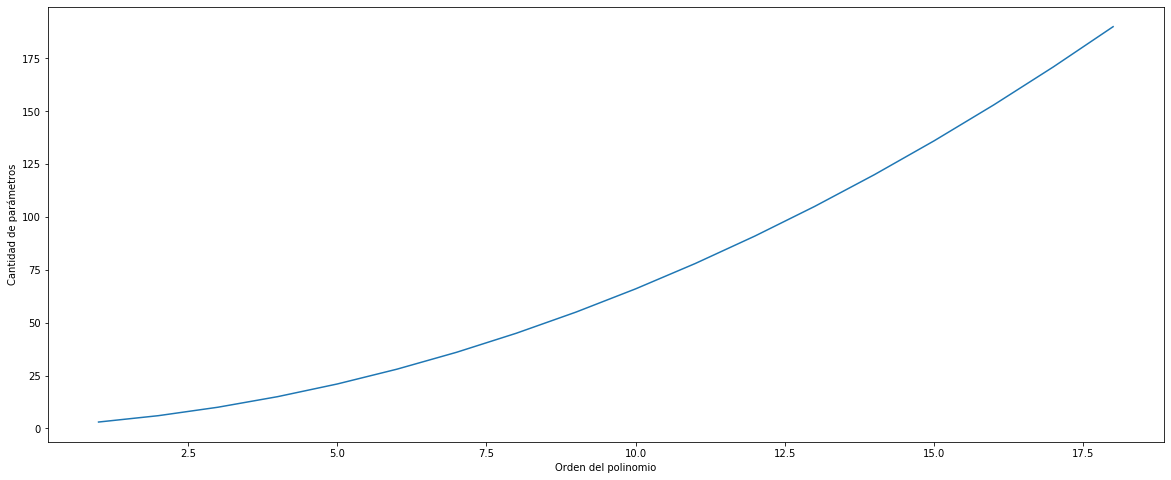

In [21]:
plt.figure(figsize=(20,8))
N = 18
pol_orders = np.linspace(1, N, N)
plt.plot(pol_orders, list(map(RHelper.params_vs_pol_order, pol_orders)))
plt.xlabel('Orden del polinomio')
plt.ylabel('Cantidad de parámetros')
plt.show()

In [44]:
print(list(zip(pol_orders, list(map(RHelper.params_vs_pol_order, pol_orders)))))

[(1.0, 3), (2.0, 6), (3.0, 10), (4.0, 15), (5.0, 21), (6.0, 28), (7.0, 36), (8.0, 45), (9.0, 55), (10.0, 66), (11.0, 78), (12.0, 91), (13.0, 105), (14.0, 120), (15.0, 136), (16.0, 153), (17.0, 171), (18.0, 190)]


In [98]:
# Cambiar a 0.25
lambd = 0.25

In [99]:
len(X_train)

59

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0.25


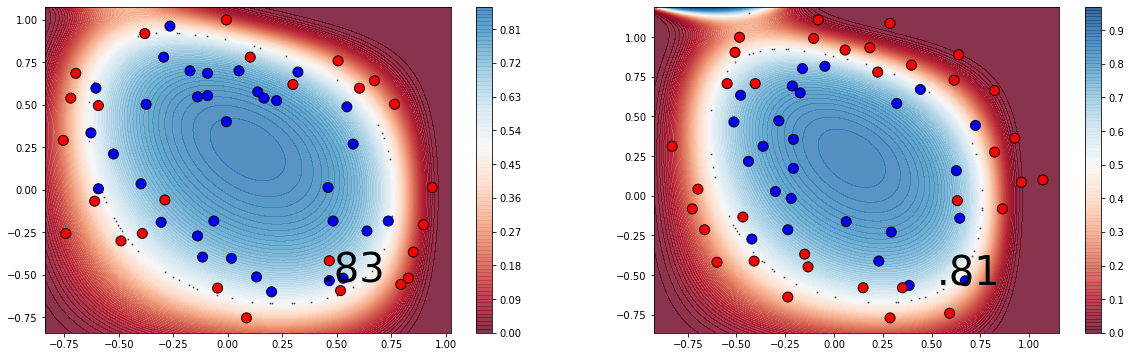

In [100]:
degree = 18
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree, lambd = lambd, mesh_res=200)

Aclaración: El overfitting se dá debido a la cantidad de parámetros, no debido a la cantidad de entradas (aumentar la cantidad de entradas hace que aumente la cantidad de parámetros)

Regresion Logistica Polinomial de orden 6, con lamdba (regularización L2):0.0


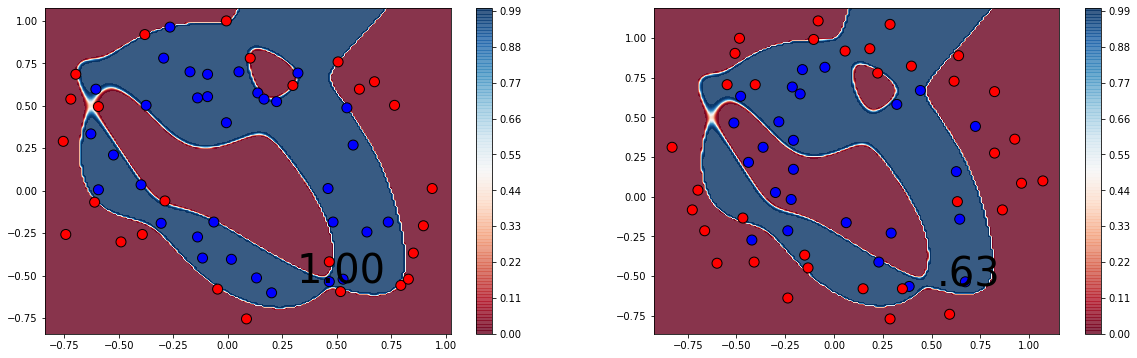

In [34]:
degree = 6
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree, lambd = lambd)

# Encontrar el orden de polinomio óptimo. Ni overfitting ni underfitting (Just Right)

Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):0.0


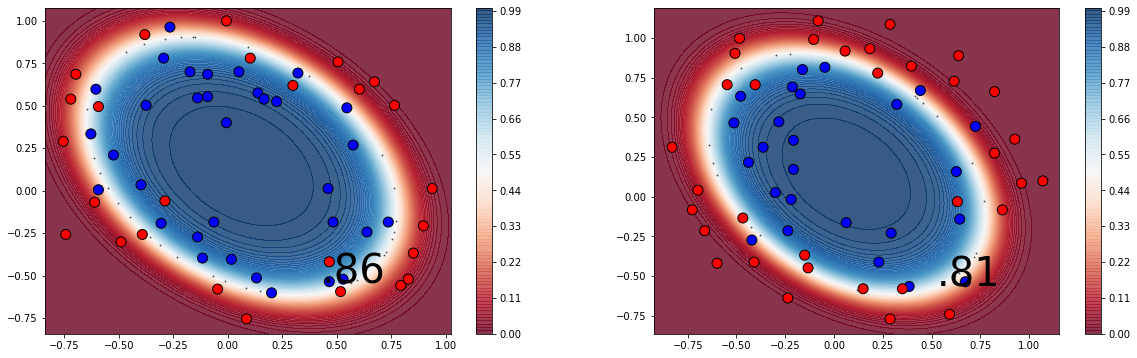

In [45]:
degree = 2
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree, lambd = lambd)

# Cual es el optimo?

In [57]:
options = [{'degree': 1, 'lambd': lambd}, 
           {'degree': 2, 'lambd': lambd}, 
           {'degree': 3, 'lambd': lambd}, 
           {'degree': 4, 'lambd': lambd}, 
           {'degree': 5, 'lambd': lambd}, 
           {'degree': 6, 'lambd': lambd}, 
           {'degree': 7, 'lambd': lambd}, 
           {'degree': 8, 'lambd': lambd}, 
           {'degree': 9, 'lambd': lambd}, 
           {'degree': 10, 'lambd': lambd},
           {'degree': 11, 'lambd': lambd},
           {'degree': 12, 'lambd': lambd},
           {'degree': 13, 'lambd':lambd},
           {'degree': 14, 'lambd': lambd}, 
           {'degree': 15, 'lambd': lambd}, 
           {'degree': 16, 'lambd': lambd}, 
           {'degree': 17, 'lambd': lambd}, 
           {'degree': 18, 'lambd': lambd}
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

/opt/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


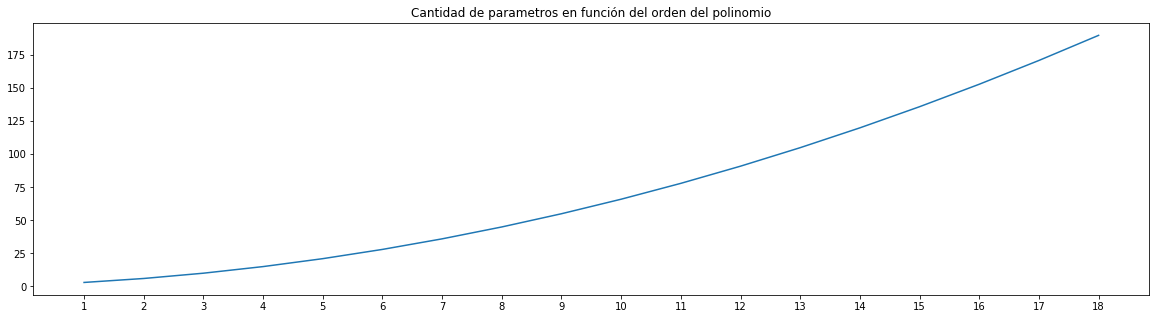

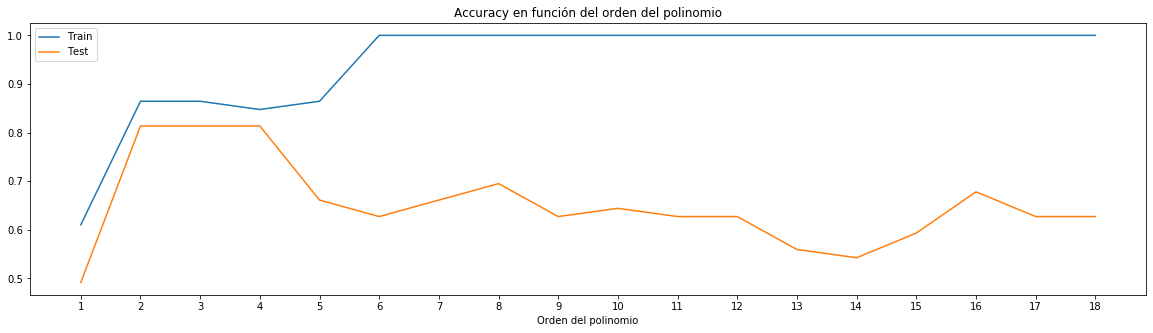

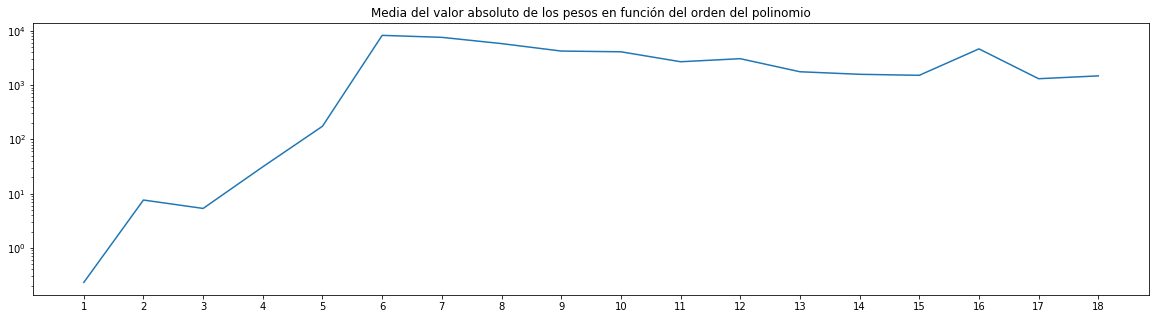

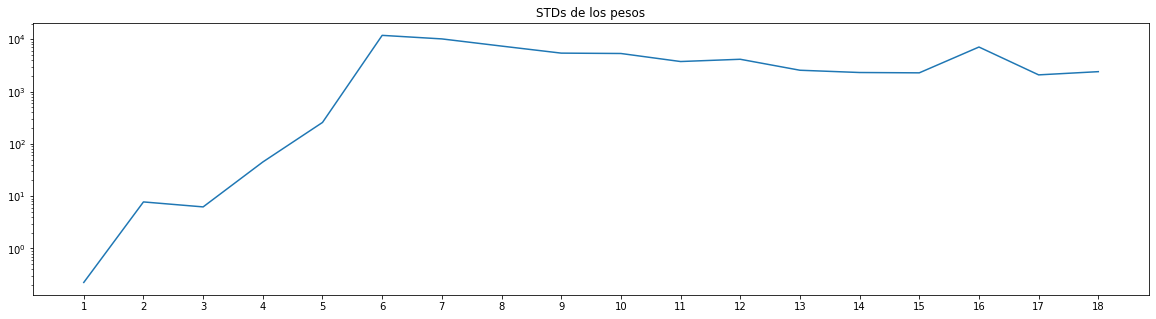

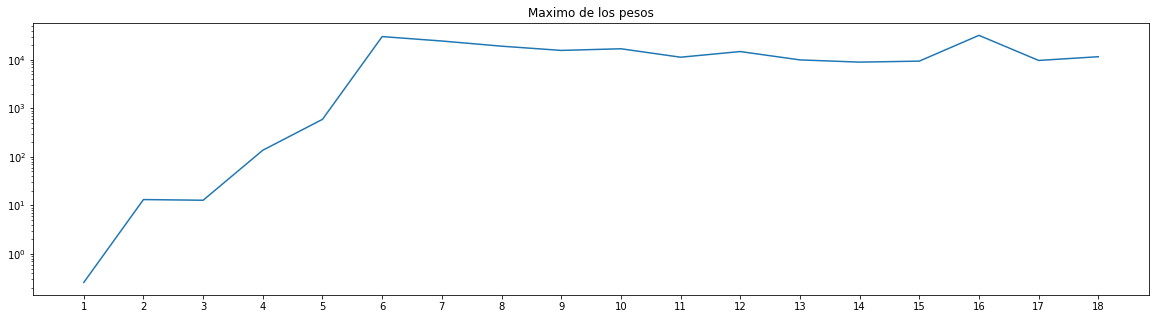

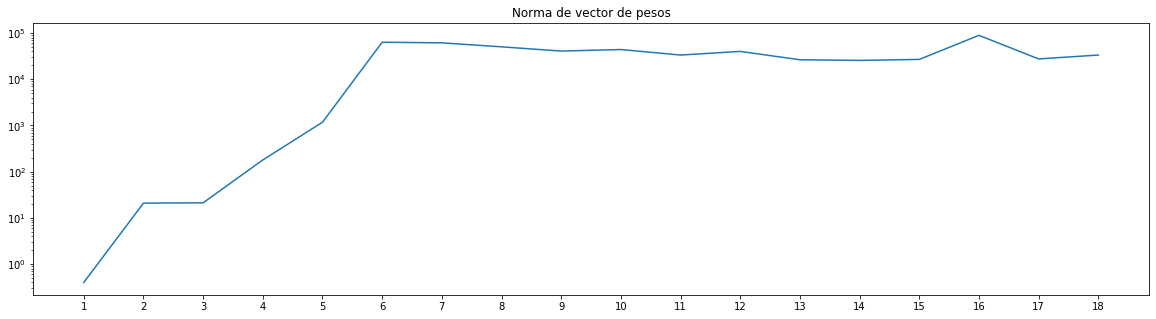

In [59]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, coefs_num)
ax.set_title("Cantidad de parametros en función del orden del polinomio")
ax.set_xticks(degrees_0)
plt.show()
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, train_acc_array_0, label="Train")
ax.plot(degrees_0, test_acc_array_0, label="Test")
ax.set_title("Accuracy en función del orden del polinomio")
ax.set_xlabel('Orden del polinomio')
ax.set_xticks(degrees_0)
ax.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.semilogy(degrees_0, coefs_array_mean_0)
plt.title("Media del valor absoluto de los pesos en función del orden del polinomio")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.semilogy(degrees_0, coefs_array_std_0)
plt.title("STDs de los pesos")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.semilogy(degrees_0, coefs_abs_max_0)
plt.title("Maximo de los pesos")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.semilogy(degrees_0, coefs_norm)
plt.title("Norma de vector de pesos")
plt.xticks(degrees_0)
plt.show()

Preguntas:
- Cual es la cantidad de parámetros óptima?
- Que pasa con los pesos?

# Que pasa si reducimos el valor de los parámetros aprendidos (pesos)?

In [60]:
from sklearn.metrics import log_loss

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):1e-10


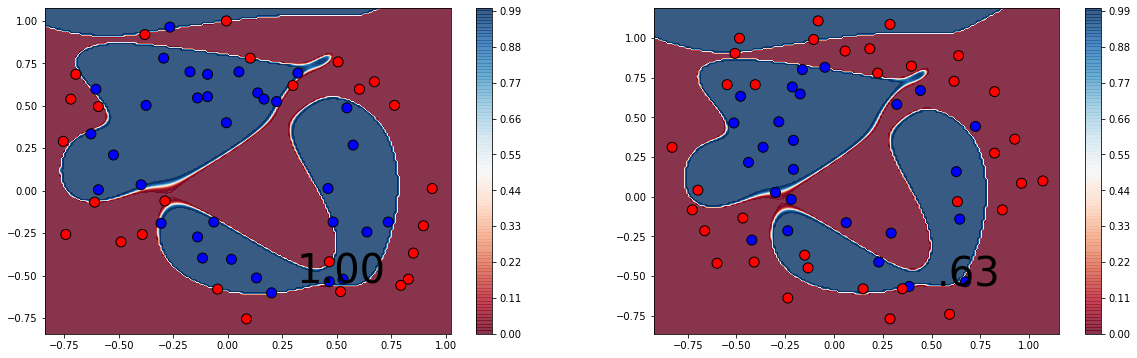

In [61]:
lambd = 1e-10
clf_logist_pol = LogisticRegression(C=1/lambd, fit_intercept=False, solver='lbfgs', max_iter=2000)

degree = 18
X_train_degree = RHelper.get_polynimial_set(X_train, degree=degree)
X_test_degree = RHelper.get_polynimial_set(X_test, degree=degree)
clf_logist_pol.fit(X_train_degree, y_train)

score_train_logist_pol = clf_logist_pol.score(X_train_degree, y_train)
score_test_logist_pol = clf_logist_pol.score(X_test_degree, y_test)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax1, mesh_res = 200)
RHelper.plot_boundaries(X_test, y_test, score_test_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax2, mesh_res = 200)
print('Regresion Logistica Polinomial de orden '+str(degree) +', con lamdba (regularización L2):' +  str(lambd))
plt.show()

In [62]:
train_loss = log_loss(y_train, clf_logist_pol.predict_proba(X_train_degree))
test_loss = log_loss(y_test, clf_logist_pol.predict_proba(X_test_degree))
print(f'Train loss: {train_loss}, Test loss: {test_loss}')

Train loss: 0.0003705531041181772, Test loss: 11.138504694613548


In [63]:
clf_logist_pol.coef_ = clf_logist_pol.coef_/50

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):1e-10


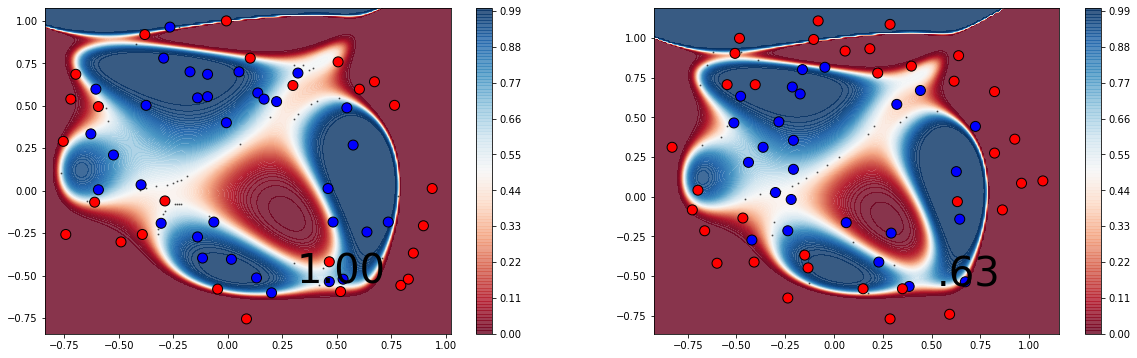

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax1, mesh_res = 200)
RHelper.plot_boundaries(X_test, y_test, score_test_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax2, mesh_res = 200)
print('Regresion Logistica Polinomial de orden '+str(degree) +', con lamdba (regularización L2):' +  str(lambd))
plt.show()

Que pasa con el accuracy y la loss?

In [21]:
train_loss = log_loss(y_train, clf_logist_pol.predict_proba(X_train_degree))
test_loss = log_loss(y_test, clf_logist_pol.predict_proba(X_test_degree))
print(f'Train loss: {train_loss}, Test loss: {test_loss}')

Train loss: 0.23297026160020345, Test loss: 3.1235560758675702


# Video recomendado

Ejemplo video Udacity:
https://youtu.be/aX_m9iyK3Ac

<img src="images/2points.png" alt="Drawing" style="width:60%;"/>

<img src="images/sigmoideas.png" alt="Drawing" style="width:60%;"/>

In [68]:
1/(1+np.exp(-20))

0.9999999979388463

Intuición: Si mantengo el valor de los pesos bajos -> eventualmente trabajo en la parte lineal, modelo lineal -> Disminuye overfitting

# Regresión de Ridge

\begin{equation}
\large J_R(w) = -\frac{1}{N}\sum_{i}^N y_nlog[\sigma(x_i^Tw)] + (1-y_n)log[1-\sigma(x_i^Tw)] + \lambda \sum_{i}^d{w_i}^2
\end{equation}

\begin{equation}
\large J_R(w) = J(w) + \lambda \sum_{i}^d{w_i}^2
\end{equation}

volver y resolver problema cambiando lambda

In [114]:
lambd = 0.00000001
expon = 3.8
deg = 18
options = [{'degree': deg, 'lambd': lambd}, 
           {'degree': deg, 'lambd': lambd*(expon)**1}, 
           {'degree': deg, 'lambd': lambd*(expon)**2}, 
           {'degree': deg, 'lambd': lambd*(expon)**3}, 
           {'degree': deg, 'lambd': lambd*(expon)**4}, 
           {'degree': deg, 'lambd': lambd*(expon)**5}, 
           {'degree': deg, 'lambd': lambd*(expon)**6}, 
           {'degree': deg, 'lambd': lambd*(expon)**7}, 
           {'degree': deg, 'lambd': lambd*(expon)**8}, 
           {'degree': deg, 'lambd': lambd*(expon)**9},
           {'degree': deg, 'lambd': lambd*(expon)**10},
           {'degree': deg, 'lambd': lambd*(expon)**11},
           {'degree': deg, 'lambd': lambd*(expon)**12},
           {'degree': deg, 'lambd': lambd*(expon)**13}, 
           {'degree': deg, 'lambd': lambd*(expon)**14}, 
           {'degree': deg, 'lambd': lambd*(expon)**15}, 
           {'degree': deg, 'lambd': lambd*(expon)**16}, 
           {'degree': deg, 'lambd': lambd*(expon)**17}, 
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

/opt/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [115]:
idx = np.argmax(test_acc_array_0)
print(test_acc_array_0[idx])
lambdas_0[idx]

0.8135593220338984


0.34449804052280963

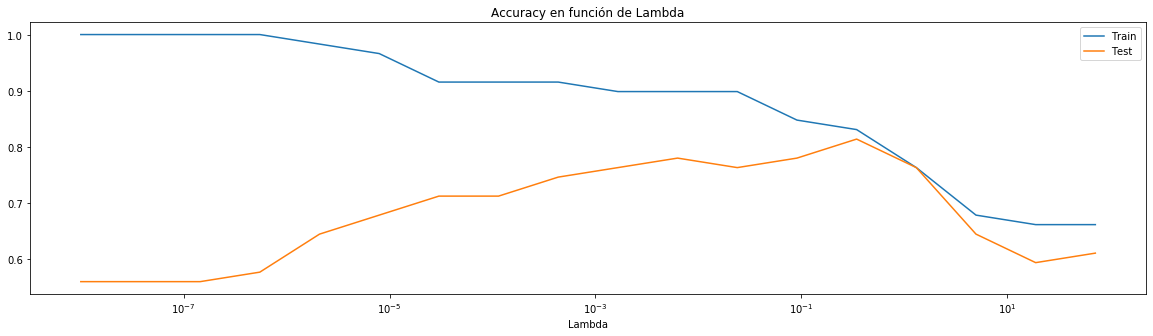

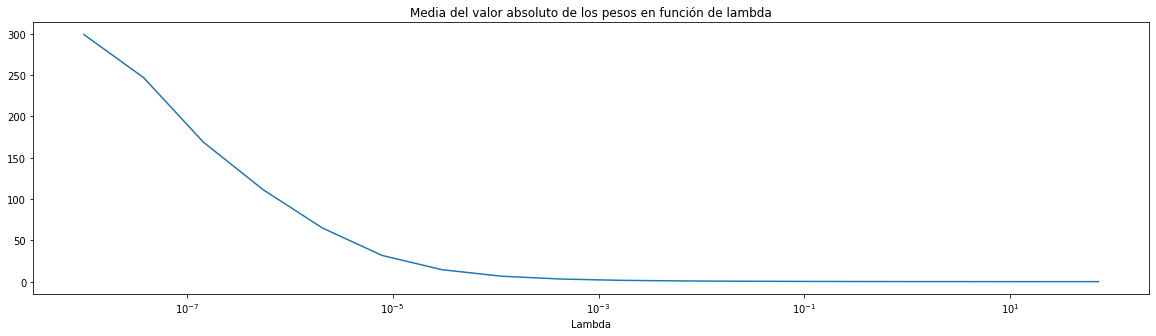

In [120]:
fig, ax = plt.subplots(figsize=(20,5))
ax.semilogx(lambdas_0, train_acc_array_0, label="Train")
ax.semilogx(lambdas_0, test_acc_array_0, label="Test")
ax.set_title("Accuracy en función de Lambda")
ax.set_xlabel('Lambda')
# ax.set_xticks(degrees_0)
ax.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.semilogx(lambdas_0, coefs_array_mean_0)
plt.title("Media del valor absoluto de los pesos en función de lambda")
plt.xlabel('Lambda')
plt.show()